<a href="https://colab.research.google.com/github/mohanpillimitla/hello/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the Keras libraries and packages
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

**we are training our model in collab**
**we need to download the images from s3.The file urls are stored in the csv file which is in my repo**:

https://github.com/mohanpillimitla/hello/blob/master/uploadimage/dress_patterns.csv.

we have to upload the csv file to some folder.Here I have uploaded the file to sample_data folder.We will read the file using pandas and will load our dataset from s3.This will take some time for downloading all the images.So u can stop executing the cell once you feel you have enough data.I think with more data we can achieve higher accuracy and better validation.The downloaded files will be deleted once the run time is disconnected.

In [2]:

import numpy as np
import pandas as pd
import requests
import os
#code for fetching the dataset
"""
   we will create a folder for each class(label)
   by getting the relevant data from the csv file.
   All the images of the dataset are stored in s3.
   we are iterating over
"""


dress_patterns_df = pd.read_csv('/content/sample_data/dress_patterns.csv')
dress_patterns = dress_patterns_df .values

# category
category = set(dress_patterns_df['category'])
print(category)

#create a folder dataset and nested folder of category
print(os.listdir())
os.mkdir('dataset_category')

for cat in category:
    print(cat)
    os.mkdir('dataset_category/'+cat)

print(os.listdir('dataset_category'))



# save image in respective category folder.

for i in range(len(dress_patterns)):
  if i%5 == 0:
    print(i, '/', len(dress_patterns))
  pattern = dress_patterns[i]
  url = pattern[3]
  unit_id = pattern[0]
  category = pattern[1]
  try:
    r = requests.get(url, allow_redirects=True)
    open('dataset_category/'+category+'/'+str(unit_id)+'.jpg', 'wb').write(r.content)
  except:
    print('ERROR at: ', i)


8450 / 10339
8455 / 10339
8460 / 10339
8465 / 10339
8470 / 10339
8475 / 10339
8480 / 10339
8485 / 10339
8490 / 10339
8495 / 10339
8500 / 10339
8505 / 10339
8510 / 10339
8515 / 10339
8520 / 10339
8525 / 10339
8530 / 10339
8535 / 10339
8540 / 10339
8545 / 10339
8550 / 10339
8555 / 10339
8560 / 10339
8565 / 10339
8570 / 10339
8575 / 10339
8580 / 10339
8585 / 10339
8590 / 10339
8595 / 10339
8600 / 10339
8605 / 10339
8610 / 10339
8615 / 10339
8620 / 10339
8625 / 10339
8630 / 10339
8635 / 10339
8640 / 10339
8645 / 10339
8650 / 10339
8655 / 10339
8660 / 10339
8665 / 10339
8670 / 10339
8675 / 10339
8680 / 10339
8685 / 10339
8690 / 10339
8695 / 10339
8700 / 10339
8705 / 10339
8710 / 10339
8715 / 10339
8720 / 10339
8725 / 10339
8730 / 10339
8735 / 10339
8740 / 10339
8745 / 10339
8750 / 10339
8755 / 10339
8760 / 10339
8765 / 10339
8770 / 10339
8775 / 10339
8780 / 10339
8785 / 10339
8790 / 10339
8795 / 10339
8800 / 10339
8805 / 10339
8810 / 10339
8815 / 10339
8820 / 10339
8825 / 10339
8830 / 10339



we are installing the split folders library.It will split our data into test and train data respectively
it is really important to validate our model byself whether our model is overfitting the training data or not. we are splitting our data into 80 % train data and 20 % test data

In [5]:
!pip install split-folders
!pip install split-folders tqdm
import splitfolders
splitfolders.ratio("/content/sample_data/dataset_category",output="dataset_category_test",seed=1337,ratio=(0.8,0.2),group_prefix=None)




Copying files: 0 files [00:00, ? files/s]

Copying files: 16 files [00:00, 145.87 files/s]

Copying files: 41 files [00:00, 165.32 files/s]

Copying files: 58 files [00:00, 164.65 files/s]

Copying files: 71 files [00:00, 147.14 files/s]

Copying files: 85 files [00:00, 144.64 files/s]

Copying files: 106 files [00:00, 159.48 files/s]

Copying files: 126 files [00:00, 169.67 files/s]

Copying files: 145 files [00:00, 174.72 files/s]

Copying files: 172 files [00:00, 194.33 files/s]

Copying files: 193 files [00:01, 196.57 files/s]

Copying files: 223 files [00:01, 218.34 files/s]

Copying files: 246 files [00:01, 208.94 files/s]

Copying files: 277 files [00:01, 230.02 files/s]

Copying files: 302 files [00:01, 193.72 files/s]

Copying files: 326 files [00:01, 203.24 files/s]

Copying files: 348 files [00:01, 196.88 files/s]

Copying files: 369 files [00:01, 194.74 files/s]

Copying files: 390 files [00:02, 109.26 files/s]

Copying files: 406 files [00:02, 113.30 files/s]

Copying fi

In [6]:
dress_patterns_df = pd.read_csv('/content/sample_data/dress_patterns.csv')
dress_patterns = dress_patterns_df.values
dress_patterns_df.head()

,_unit_id,category,confidence,image_url
0,851505459,plain,1,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505461,plain,1,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505464,plain,1,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505465,plain,1,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505466,floral,1,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [15]:
print(os.listdir('dataset_category_test/train'))
print(os.listdir('dataset_category_test/train/animal'))
print(len(os.listdir('dataset_category_test/train')))
print(len(os.listdir('dataset_category_test/val')))


['skull', 'animal', 'stripes', 'cartoon', 'ikat', 'polka dot', 'squares', 'scales', 'tribal', 'floral', 'chevron', 'plain', 'stars', 'geometry', 'houndstooth', 'letter_numb', 'OTHER']
['851513384.jpg', '851524189.jpg', '851519336.jpg', '851510208.jpg', '851518958.jpg', '851516626.jpg', '851518484.jpg', '851511384.jpg', '851506836.jpg', '851516941.jpg', '851518030.jpg', '851510039.jpg', '851507677.jpg', '851519463.jpg', '851513805.jpg', '851515692.jpg', '851517824.jpg', '851516749.jpg', '851518582.jpg', '851509327.jpg', '851512064.jpg', '851516915.jpg', '851505500.jpg', '851513663.jpg', '851506960.jpg', '851512857.jpg', '851509278.jpg', '851512038.jpg', '851513881.jpg', '851510993.jpg', '851519637.jpg', '851519535.jpg', '851506556.jpg', '851512126.jpg', '851513180.jpg', '851513804.jpg', '851508293.jpg', '851513002.jpg', '851511202.jpg', '851519260.jpg', '851509039.jpg', '851520292.jpg', '851520327.jpg', '851510736.jpg', '851511804.jpg', '851509300.jpg', '851512970.jpg', '851508682.jpg',

In [27]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 17, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [28]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset_category_test/train',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset_category_test/val',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 8265 images belonging to 17 classes.
Found 2074 images belonging to 17 classes.


In [29]:
classifier.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_9 (Dense)              (None, 17)               

In [30]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 516,
                         epochs = 8,
                         validation_data = test_set,
                         validation_steps =129 )



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
516/516 [==============================] - 145s 280ms/step - loss: 1.2935 - accuracy: 0.6542 - val_loss: 1.1289 - val_accuracy: 0.6923
Epoch 2/8
516/516 [==============================] - 143s 276ms/step - loss: 1.1132 - accuracy: 0.6829 - val_loss: 1.0813 - val_accuracy: 0.7040
Epoch 3/8
516/516 [==============================] - 144s 279ms/step - loss: 1.0170 - accuracy: 0.7163 - val_loss: 1.0488 - val_accuracy: 0.7117
Epoch 4/8
516/516 [==============================] - 144s 280ms/step - loss: 0.9877 - accuracy: 0.7118 - val_loss: 1.0950 - val_accuracy: 0.6894
Epoch 5/8
516/516 [==============================] - 145s 281ms/step - loss: 0.9680 - accuracy: 0.7276 - val_loss: 1.0444 - val_accuracy: 0.7122
Epoch 6/8
516/516 [==============================] - 145s 281ms/step - loss: 0.9690 - accuracy: 0.7186 - val_loss: 0.9947 - val_accuracy: 0.7306
Epoch 7/8
516/516 [==============================] - 147s 286ms/step - loss: 0.9218 - accuracy: 0.7328 - val_loss: 1.0428 - val_ac

In [31]:
# Save Model to Disk
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk


#  TEST single image

In [71]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('851505531.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [72]:
result[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [73]:
index = np.where(result[0] == 1)[0][0]
index

9

In [74]:
list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]

'plain'

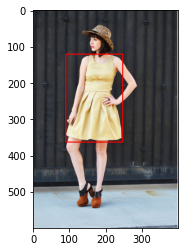

In [75]:
img = cv2.imread('851505531.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))